# Part B: Exploration + Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

Booking data treatment

In [8]:
booking_data = pd.read_csv('scraped_data/booking_data.csv')
booking_data.head(3)

# print(booking_data.shape)
# booking_data
# print(f'Nulls before eliminating: {booking_data.isnull().sum()}')
# booking_data['Cleanliness']

# booking_data.drop(['Card Deal', 'Cleanliness'], axis=1, inplace=True)
# booking_data = booking_data[booking_data['Payment Policy'].notnull()]
# booking_data = booking_data[booking_data['Cancellation Policy'].notnull()]
# booking_data = booking_data[booking_data['Bed Type'].notnull()]

,Hotel Name,Score,Distance to Center,Price,Taxes and Fees,Total Price,Nights and Adults,Card Deal,Stars,Subway Access,Neighborhood,Room Type,Bed Type,Cancellation Policy,Payment Policy,Review Class,Number of Reviews,Date of search,Checkin,Checkout
0,Roxy Hotel New York,8.5,5.8,339,99,438.0,"1 night,2 adults",NaN,4,True,Tribeca,Deluxe King Room,1 king bed,NaN,NaN,Very Good,1248,2024-06-17,2024-06-18,2024-06-19
1,Aloft New York Chelsea,7.6,2.5,299,48,347.0,"1 night,2 adults",NaN,4,True,Chelsea,King Room,1 king bed,NaN,NaN,Good,60,2024-06-17,2024-06-18,2024-06-19
2,Residence Inn by Marriott New York Downtown Ma...,8.5,6.9,170,59,229.0,"1 night,2 adults",NaN,4,True,Manhattan,King Studio,Entire studio•1 bathroom•25m²,NaN,NaN,Very Good,1696,2024-06-17,2024-06-18,2024-06-19


Expedia data treatment

In [7]:
expedia_data = pd.read_csv('scraped_data/expedia_data.csv')
expedia_data
# expedia_data.drop('Includes', axis=1, inplace=True)
# expedia_data.dropna(subset=['Review'], inplace=True)
# expedia_data.isnull().sum()

# expedia_data['DateOfSearch'] = pd.to_datetime(expedia_data['DateOfSearch'])
# expedia_data['Checkin'] = pd.to_datetime(expedia_data['Checkin'])
# expedia_data['Checkout'] = pd.to_datetime(expedia_data['Checkout'])

# expedia_data['Review'] = expedia_data['Review'].str.replace(',', '')
# expedia_data['Review'] = expedia_data['Review'].str.split(' ', expand=True)[0].str.split('(', expand=True)[1].astype(int)

# expedia_data['Price'] = expedia_data['Price'].str.replace('$', '', regex=True).str.replace(',', '', regex=True).str.split(' ', expand=True)[0].astype(float)

,Hotel Name,Price Before Taxes,Rating,Classification,Reviews,Stay Type,Bed type,Neighborhood,District,Cancellation policy,Payment policy,Price After Taxes,Date of search,Checkin,Checkout
0,Hotel 32 32,161,8.0,Very Good,1626,NaN,NaN,New York,New York,NaN,NaN,176,2024-06-17,2024-06-18,2024-06-19
1,Moxy NYC East Village,161,8.8,Excellent,1038,NaN,NaN,New York,New York,NaN,NaN,223,2024-06-17,2024-06-18,2024-06-19
2,Courtyard by Marriott New York Manhattan / Che...,176,9.2,Wonderful,1008,NaN,NaN,Chelsea,Chelsea,NaN,NaN,205,2024-06-17,2024-06-18,2024-06-19


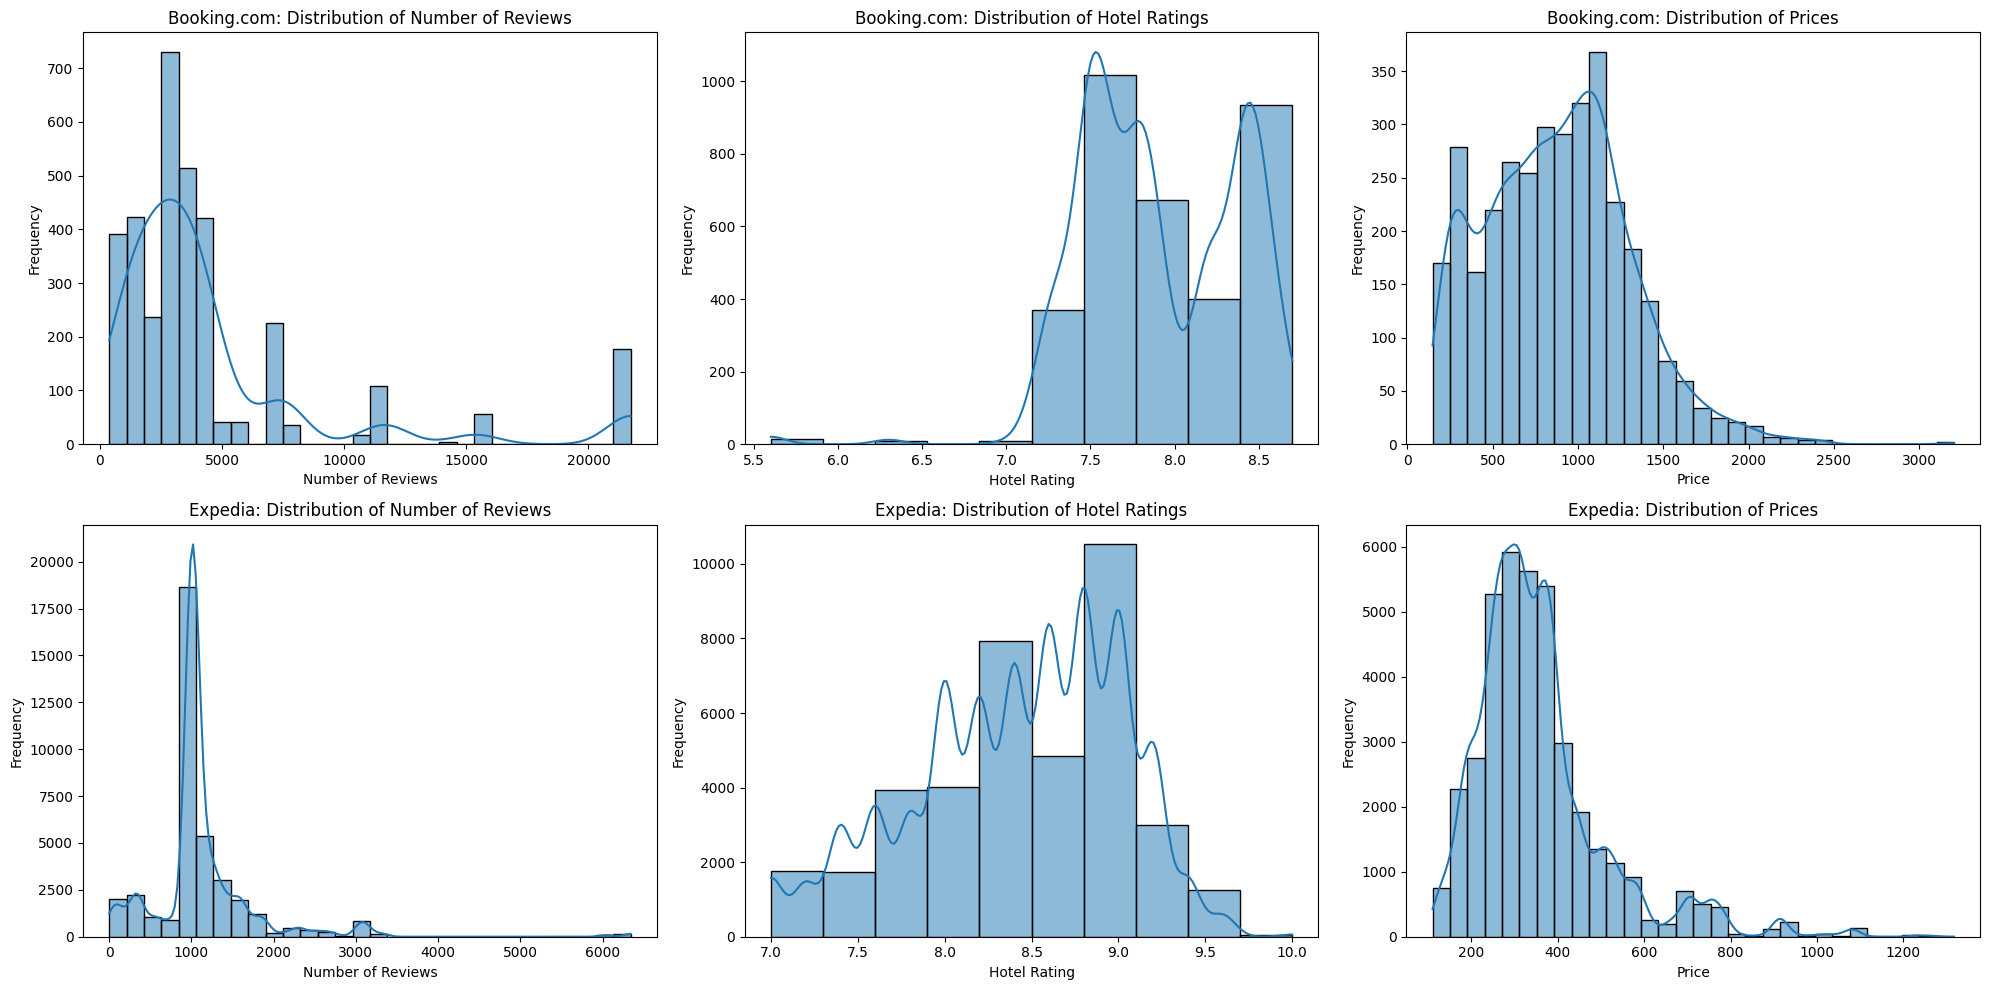

In [112]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Booking.com data plots
# 1. Number of reviews
sns.histplot(booking_data['Number of Reviews'].astype(int), bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Booking.com: Distribution of Number of Reviews')
axs[0, 0].set_xlabel('Number of Reviews')
axs[0, 0].set_ylabel('Frequency')

# 2. Hotel rating in reviews
sns.histplot(booking_data['Score'].astype(float), bins=10, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Booking.com: Distribution of Hotel Ratings')
axs[0, 1].set_xlabel('Hotel Rating')
axs[0, 1].set_ylabel('Frequency')

# 3. Prices
sns.histplot(booking_data['Total Price'].astype(float), bins=30, kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Booking.com: Distribution of Prices')
axs[0, 2].set_xlabel('Price')
axs[0, 2].set_ylabel('Frequency')

# Expedia data plots
# 1. Number of reviews
sns.histplot(expedia_data['Review'].astype(int), bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Expedia: Distribution of Number of Reviews')
axs[1, 0].set_xlabel('Number of Reviews')
axs[1, 0].set_ylabel('Frequency')

# 2. Hotel rating in reviews
sns.histplot(expedia_data['Score'].astype(float), bins=10, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Expedia: Distribution of Hotel Ratings')
axs[1, 1].set_xlabel('Hotel Rating')
axs[1, 1].set_ylabel('Frequency')

# 3. Prices
sns.histplot(expedia_data['Price'].astype(float), bins=30, kde=True, ax=axs[1, 2])
axs[1, 2].set_title('Expedia: Distribution of Prices')
axs[1, 2].set_xlabel('Price')
axs[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- Remove from data hotels that based on price column are an outlier (using 
Tukey 1.5IQR method).

In [113]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

booking_data_no_outliers = remove_outliers(booking_data, 'Total Price')
expedia_data_no_outliers = remove_outliers(expedia_data, 'Price')

- Convert variables with Ordinal characteristic to numbers with order relation 
(for example Good < Very Good<Excellent)

Booking data

In [114]:
# Change here the values
booking_data_no_outliers = booking_data_no_outliers.copy()
print(booking_data_no_outliers['Review Class'].unique())

# Eliminating all the rows where Review Class column says 'Review score'
print(booking_data_no_outliers.shape)
booking_data_no_outliers = booking_data_no_outliers[booking_data_no_outliers['Review Class'] != 'Review score']
print(booking_data_no_outliers.shape)

ordinal_mapping = {
    'Good': 1,
    'Very Good': 2,
    'Excellent': 3,
    'Wonderful': 4,
}

booking_data_no_outliers['Review Class'] = booking_data_no_outliers['Review Class'].map(ordinal_mapping)

['Good' 'Very Good' 'Excellent' 'Review score']
(3397, 19)
(3373, 19)


Expedia data

In [115]:
# Make a copy of the DataFrame
expedia_data_no_outliers = expedia_data_no_outliers.copy()

# Change here the values
print(expedia_data_no_outliers['Rating'].unique())

# Eliminating all the rows where Review Class column says 'Review score'
ordinal_mapping = {
    'Good': 0,
    'Very Good': 1,
    'Excellent': 2,
    'Wonderful': 3,
    'Exceptional': 4,
}
expedia_data_no_outliers['Rating'] = expedia_data_no_outliers['Rating'].map(ordinal_mapping)

['Wonderful' 'Excellent' 'Good' 'Very Good' 'Exceptional']


- Additional example – the bed type by order relation. First you have to 
calculate the bed types (distinct) out of total data you have). And then King 
Room should get higher value then Queen Room for example.

Booking data

In [7]:
# Calculate distinct bed types and create mapping
bed_types = booking_data_no_outliers['Bed Type'].unique()

# Check if x is a string before checking if 'queen' or 'king' are in x
bed_type_mapping = {bed_type: idx+1 for idx, bed_type in enumerate(sorted(bed_types, key=lambda x: ('queen' in x, 'king' in x) if isinstance(x, str) else (False, False), reverse=True))}

booking_data_no_outliers['Bed Type'] = booking_data_no_outliers['Bed Type'].map(bed_type_mapping)

Expedia data, (PENDING)

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Columns to one-hot encode
columns_to_encode = ['Cancellation Policy', 'Payment Policy', 'Neighborhood']

# One-hot encode the columns
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(booking_data_no_outliers[columns_to_encode])

# Get the correct feature names after encoding
feature_names = encoder.get_feature_names_out(input_features=columns_to_encode)

# Create a DataFrame with the encoded data and the correct feature names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Merge with original dataframe
data = booking_data_no_outliers.drop(columns=columns_to_encode).reset_index(drop=True)
data = pd.concat([data, encoded_df], axis=1)

In [9]:
import seaborn as sns

# Select relevant columns for the PairGrid
# pairgrid_columns = ['Total Price', 'Score', 'Review Class', 'Number of Reviews', 'Distance to Center', 'Stars']

# # Plot PairGrid
# sns.pairplot(data[pairgrid_columns])
# plt.show()

### Conclusions / Insights:

1. **Total Price vs. Score**:
    - There appears to be a weak positive correlation between the hotel score and the total price. Higher scores tend to have slightly higher prices.

2. **Total Price vs. Review Class**:
    - The review class, which is an ordinal variable, shows a positive relationship with the total price. Hotels with higher review classes generally have higher prices.

3. **Total Price vs. Number of Reviews**:
    - The relationship between the number of reviews and the total price is not very clear from the scatter plot. While some higher-priced hotels have a large number of reviews, others do not, indicating that the number of reviews alone is not a strong predictor of price.

4. **Total Price vs. Distance to Center**:
    - There is no strong visible correlation between the distance to the center and the total price. Prices seem to vary widely regardless of the distance to the center.

5. **Total Price vs. Stars**:
    - There is a clearer positive correlation between the number of stars and the total price. Higher-star hotels tend to have higher prices, which is expected as star ratings usually reflect the quality and amenities of the hotel.

### PairGrid Detailed Analysis:

- **Score**:
    - Scores are generally clustered around 7 to 9, with higher-priced hotels having slightly higher scores.

- **Review Class**:
    - As expected, higher review classes correspond to higher prices. Hotels rated as "Excellent" are generally more expensive than those rated "Very Good" or "Good".

- **Number of Reviews**:
    - The number of reviews varies widely for hotels regardless of the price, indicating that other factors might influence the number of reviews a hotel receives.

- **Distance to Center**:
    - The scatter plots show that hotels both close to and far from the center have a wide range of prices. This suggests that location within the city center is not the sole determinant of hotel pricing.

- **Stars**:
    - The number of stars is a strong indicator of price, with 4 and 5-star hotels tending to be priced higher than 2 and 3-star hotels.

### Relation to the Target Variable (Price):

The PairGrid reveals that:
- **Stars** and **Review Class** are the most indicative of higher prices, reflecting their importance in the perceived quality and luxury of the hotel.
- **Score** also has a positive relationship with price, but it is not as strong as that of the stars and review class.
- **Number of Reviews** and **Distance to Center** do not show a strong correlation with price, indicating that these factors alone do not significantly influence hotel pricing.

This analysis suggests that higher star ratings and better review classes are strong predictors of higher hotel prices, while the number of reviews and proximity to the city center are less influential on pricing.

# Part C – prediction of rooms prices

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Selecting relevant features for modeling
features = ['Score', 'Distance to Center', 'Stars', 'Subway Access', 
            'Review Class', 'Number of Reviews', 'ttt', 'los'] + \
           [col for col in data.columns if col.startswith('Neighborhood_') or col.startswith('Cancellation Policy_') or col.startswith('Payment Policy_')]
target = 'Total Price'

X = data[features]
y = data[target]

# # Split the data into training and testing sets (70-30 ratio)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

def train_and_evaluate_models(X, y):
    # Split the data into training and testing sets (70-30 ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        # 'Gaussian Process': GaussianProcessRegressor(kernel=C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1)), random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
    }

    # Dictionary to store results
    results = {
        'Model': [],
        'Train RMSE': [],
        'Test RMSE': [],
        'Train MAE': [],
        'Test MAE': [],
        'Train R2': [],
        'Test R2': []
    }

    # Train, predict and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate error metrics
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        rmse_train = np.sqrt(mse_train)
        rmse_test = np.sqrt(mse_test)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        # Append results
        results['Model'].append(name)
        results['Train RMSE'].append(rmse_train)
        results['Test RMSE'].append(rmse_test)
        results['Train MAE'].append(mae_train)
        results['Test MAE'].append(mae_test)
        results['Train R2'].append(r2_train)
        results['Test R2'].append(r2_test)

        # Plot residuals
        plt.figure(figsize=(8, 3))
        plt.subplot(1, 2, 1)
        sns.residplot(x=y_train, y=y_train_pred - y_train, lowess=True, color="g")
        plt.title(f'{name} - Train Residuals')
        plt.xlabel('Actual Prices')
        plt.ylabel('Residuals')

        plt.subplot(1, 2, 2)
        sns.residplot(x=y_test, y=y_test_pred - y_test, lowess=True, color="b")
        plt.title(f'{name} - Test Residuals')
        plt.xlabel('Actual Prices')
        plt.ylabel('Residuals')

        plt.tight_layout()
        plt.show()

    # Convert results to DataFrame and print
    results_df = pd.DataFrame(results)

    return results_df

# Train and evaluate models
results_df = train_and_evaluate_models(X, y)

ValueError: could not convert string to float: 'in city centre'

In [ ]:
results_df

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression,172.138825,167.064800,131.149745,127.768756,0.820469,0.825894
1,Decision Tree,67.892481,171.375907,31.239772,114.107103,0.972073,0.816793
2,Random Forest,77.500058,143.972554,50.188512,99.438936,0.963610,0.870699
3,Gradient Boosting,124.022582,128.754622,91.969784,95.808300,0.906807,0.896588
4,AdaBoost,191.321492,192.573131,159.022655,161.952528,0.778227,0.768669


In [ ]:
# Adding new feature: 'Price per Night' and 'Price per Adult'
data['Price per Night'] = data['Total Price'] / data['ttt']
data['Price per Adult'] = data['Total Price'] / data['los']

# Update features list
features = ['Score', 'Distance to Center', 'Stars', 'Subway Access', 
            'Review Class', 'Number of Reviews', 'ttt', 'los', 'Price per Night', 'Price per Adult'] + \
           [col for col in data.columns if col.startswith('Neighborhood_') or col.startswith('Cancellation Policy_') or col.startswith('Payment Policy_')]

X = data[features]
y = data[target]

# Split the data into training and testing sets (70-30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train Random Forest model
rf_model.fit(X_train, y_train)

# Get feature importances
importances_rf = rf_model.feature_importances_
feature_names_rf = X.columns

# Create DataFrame for feature importances
rf_importances_df = pd.DataFrame({'Feature': feature_names_rf, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)
print(rf_importances_df)

                              Feature    Importance
7                                 los  7.415699e-01
9                     Price per Adult  2.564301e-01
0                               Score  7.908268e-04
5                   Number of Reviews  6.682371e-04
1                  Distance to Center  1.563652e-04
23       Neighborhood_Upper East Side  9.156308e-05
8                     Price per Night  8.914349e-05
6                                 ttt  6.103703e-05
4                        Review Class  5.454712e-05
22               Neighborhood_Tribeca  4.358717e-05
17             Neighborhood_Manhattan  2.717459e-05
2                               Stars  1.315979e-05
24       Neighborhood_Upper West Side  2.162673e-06
13        Neighborhood_Hell's Kitchen  1.086126e-06
18          Neighborhood_Midtown East  5.428834e-07
25          Neighborhood_Williamsburg  1.460193e-07
19           Neighborhood_Murray Hill  1.419763e-07
20                 Neighborhood_NoMad  1.154417e-07
21          

In [ ]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test, random_state=42)

# Create DataFrame for permutation importances
perm_importances_df = pd.DataFrame({'Feature': feature_names_rf, 'Importance': perm_importance.importances_mean}).sort_values(by='Importance', ascending=False)
print(perm_importances_df)

                              Feature    Importance
7                                 los  1.950755e+00
9                     Price per Adult  6.166368e-01
0                               Score  2.290184e-04
5                   Number of Reviews  1.334614e-04
1                  Distance to Center  8.818942e-05
4                        Review Class  5.974315e-05
22               Neighborhood_Tribeca  3.483989e-05
23       Neighborhood_Upper East Side  2.909085e-05
17             Neighborhood_Manhattan  4.844380e-06
2                               Stars  4.768197e-07
18          Neighborhood_Midtown East  1.428242e-07
20                 Neighborhood_NoMad  2.846841e-08
21                  Neighborhood_SoHo  9.466816e-09
25          Neighborhood_Williamsburg  6.512626e-09
19           Neighborhood_Murray Hill  5.029582e-09
16       Neighborhood_Lower East Side  2.088737e-09
10     Neighborhood_Downtown Brooklyn  1.339146e-09
14           Neighborhood_Jersey City  1.189659e-11
15      Neig

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain models with scaled data and evaluate performance
rf_model.fit(X_train_scaled, y_train)
y_train_pred_rf_scaled = rf_model.predict(X_train_scaled)
y_test_pred_rf_scaled = rf_model.predict(X_test_scaled)

# Calculate error metrics for scaled data
mse_train_rf_scaled = mean_squared_error(y_train, y_train_pred_rf_scaled)
mse_test_rf_scaled = mean_squared_error(y_test, y_test_pred_rf_scaled)
rmse_train_rf_scaled = np.sqrt(mse_train_rf_scaled)
rmse_test_rf_scaled = np.sqrt(mse_test_rf_scaled)
mae_train_rf_scaled = mean_absolute_error(y_train, y_train_pred_rf_scaled)
mae_test_rf_scaled = mean_absolute_error(y_test, y_test_pred_rf_scaled)
r2_train_rf_scaled = r2_score(y_train, y_train_pred_rf_scaled)
r2_test_rf_scaled = r2_score(y_test, y_test_pred_rf_scaled)

print(f"Random Forest Regressor with Scaling - Train RMSE: {rmse_train_rf_scaled}, Test RMSE: {rmse_test_rf_scaled}")
print(f"Random Forest Regressor with Scaling - Train MAE: {mae_train_rf_scaled}, Test MAE: {mae_test_rf_scaled}")
print(f"Random Forest Regressor with Scaling - Train R2: {r2_train_rf_scaled}, Test R2: {r2_test_rf_scaled}")

Random Forest Regressor with Scaling - Train RMSE: 2.4089230615802784, Test RMSE: 7.203442613724393
Random Forest Regressor with Scaling - Train MAE: 0.580373532550685, Test MAE: 1.5115505804311717
Random Forest Regressor with Scaling - Train R2: 0.9999648417195355, Test R2: 0.9996763143878324
